In [71]:
#Import necessary libraries
import os
import pandas as pd
import json
from math import sqrt
import numpy as np

In [5]:
#importing the training set
pwd = os.getcwd()
filepath = os.path.join(pwd, "debug_train_dejsonified.csv")
df_train=pd.read_csv(filepath)

print(df_train.head())

  channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  1131660440785968503   
1  Organic Search  20160902   377306020877927890   
2  Organic Search  20160902  3895546263509774583   
3  Organic Search  20160902  4763447161404445595   
4  Organic Search  20160902    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime continent     subContinent  ...  \
0            1      1472830385      Asia     Western Asia  ...   
1            1      1472880147   Oceania      Australasia  ...   
2            1      1472865386    Europe  Southern Europe  ...

### Basic Data Explorationa and Cleaning 

In [6]:
df=pd.read_csv(filepath, parse_dates=['date'])

/Users/yvankammelu/anaconda3/envs/causalml-py38/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Exploring the dataset; checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   channelGrouping                      903653 non-null  object        
 1   date                                 903653 non-null  datetime64[ns]
 2   fullVisitorId                        903653 non-null  object        
 3   sessionId                            903653 non-null  object        
 4   socialEngagementType                 903653 non-null  object        
 5   visitId                              903653 non-null  int64         
 6   visitNumber                          903653 non-null  int64         
 7   visitStartTime                       903653 non-null  int64         
 8   continent                            903653 non-null  object        
 9   subContinent                         903653 non-null  object        
 

In [8]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (903653, 55)


In [9]:
# Checking null values in the dataset
# Note that null values in the transactionRevenue column means that the customer did not make a purchase
df.isnull().sum()

channelGrouping                             0
date                                        0
fullVisitorId                               0
sessionId                                   0
socialEngagementType                        0
visitId                                     0
visitNumber                                 0
visitStartTime                              0
continent                                   0
subContinent                                0
country                                     0
region                                      0
metro                                       0
city                                        0
cityId                                      0
networkDomain                               0
latitude                                    0
longitude                                   0
networkLocation                             0
browser                                     0
browserVersion                              0
browserSize                       

In [10]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64


Value counts for date:
2016-11-28    4807
2016-11-15    4685
2016-11-14    4466
2016-11-30    4435
2016-10-26    4375
              ... 
2017-05-14    1290
2017-05-13    1251
2016-12-30    1232
2016-12-24    1231
2016-12-31    1211
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
1957458976293878100    262
824839726118485274     245
1856749147915772585    188
3608475193341679870    186
3269834865385146569    152
                      ... 
6922417057126708584      1
2234301967377757304      1
842787683906860984       1
7313631604993900517      1
5744576632396406899      1
Name: fullVisitorId, Length: 723803, dtype: int64


Value counts for sessionId:
14108533830165900_1482391162      2
48535811147

channelgrouping: other?
socialEngagementType: Drop becasue all values are unique
continent and subcontinent: (not set): DROP 

### Continent

In [11]:
rows_to_drop = df[(df['continent'] == "(not set)") & (df['subContinent'] == "(not set)")].index
df.drop(rows_to_drop, inplace=True)

for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    380961
Social            225664
Direct            142709
Referral          104790
Paid Search        25307
Affiliates         16372
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64


Value counts for date:
2016-11-28    4799
2016-11-15    4679
2016-11-14    4460
2016-11-30    4432
2016-10-26    4372
              ... 
2017-05-14    1290
2017-05-13    1250
2016-12-30    1230
2016-12-24    1227
2016-12-31    1210
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
1957458976293878100    262
824839726118485274     245
1856749147915772585    188
3608475193341679870    186
3269834865385146569    152
                      ... 
7408034330202575393      1
7969358389793770411      1
4908708365405540995      1
7581654999621349504      1
5744576632396406899      1
Name: fullVisitorId, Length: 722497, dtype: int64


Value counts for sessionId:
8217470092518351317_1498632649    2
85703115682

### Country

In [12]:
# Get the value counts for the 'country' column
country_counts = df['country'].value_counts()

# Iterate through the Series and print each country with its count
for country, count in country_counts.items():
    print(f"{country}: {count}")


United States: 364744
India: 51140
United Kingdom: 37393
Canada: 25869
Vietnam: 24598
Turkey: 20522
Thailand: 20123
Germany: 19980
Brazil: 19783
Japan: 19731
France: 15832
Mexico: 13225
Taiwan: 12996
Australia: 12698
Russia: 11662
Spain: 11658
Netherlands: 11453
Italy: 11332
Poland: 9693
Indonesia: 9273
Philippines: 9244
Singapore: 7172
Ireland: 6493
Malaysia: 6439
Romania: 6428
Ukraine: 5577
Israel: 5563
Peru: 5546
Sweden: 5315
South Korea: 5237
Argentina: 5037
Colombia: 4880
Hong Kong: 4718
Belgium: 4442
Switzerland: 4427
Czechia: 4247
Pakistan: 4010
China: 3881
Greece: 3370
Denmark: 3319
United Arab Emirates: 3144
Saudi Arabia: 3132
Austria: 2796
Hungary: 2513
Portugal: 2376
Egypt: 2343
Bangladesh: 2297
Norway: 2250
New Zealand: 2194
Venezuela: 2132
South Africa: 2099
Algeria: 2055
Bulgaria: 2046
Chile: 1950
Morocco: 1907
Serbia: 1872
Slovakia: 1788
Sri Lanka: 1468
Nigeria: 1446
Croatia: 1396
Ecuador: 1251
Tunisia: 1194
Belarus: 976
Kazakhstan: 968
Finland: 959
Dominican Republic: 9

### Region

In [13]:
# Get the value counts for the 'country' column
region_counts = df['region'].value_counts()

# Iterate through the Series and print each country with its count
for region, count in region_counts.items():
    print(f"{region}: {count}")


not available in demo dataset: 508211
California: 107494
New York: 26431
(not set): 26384
England: 13198
Texas: 8749
Bangkok: 7709
Washington: 7642
Illinois: 7585
Ho Chi Minh: 7250
Istanbul: 6330
Maharashtra: 6184
Ontario: 5997
Taipei City: 5788
Karnataka: 5476
Delhi: 5278
Hanoi: 5141
New South Wales: 4932
Tamil Nadu: 4632
Ile-de-France: 4338
State of Sao Paulo: 4189
Telangana: 3955
County Dublin: 3650
Tel Aviv District: 3633
Tokyo: 3341
Jakarta: 3338
Masovian Voivodeship: 3288
Virginia: 3101
Community of Madrid: 2937
Victoria: 2741
Massachusetts: 2640
Quebec: 2585
Michigan: 2578
Mexico City: 2556
District of Columbia: 2532
Georgia: 2476
Seoul: 2380
Federal Territory of Kuala Lumpur: 2234
Metro Manila: 2192
Moscow: 2151
Pennsylvania: 1846
West Bengal: 1840
Lima Region: 1794
Bogota: 1635
North Holland: 1544
Ankara: 1511
Bucharest: 1431
Catalonia: 1427
Kyiv city: 1339
Izmir: 1321
Oregon: 1319
Berlin: 1244
Lombardy: 1235
Buenos Aires: 1226
Dublin City: 1220
Zurich: 1186
New Taipei City: 1

Droping the Rows for Region:

not available in demo dataset: 508211

(not set): 26384

In [14]:
df_checkpoint = df.copy()

# Drop rows where 'region' is "(not set)" or "not available in demo dataset"
df = df[~df['region'].isin(["(not set)", "not available in demo dataset"])]

# Verify the changes by checking the counts again (optional)
print(df['region'].value_counts(dropna=False))


California                 107494
New York                    26431
England                     13198
Texas                        8749
Bangkok                      7709
                            ...  
Abruzzo                         6
Lviv Oblast                     6
Kumamoto Prefecture             5
San Salvador Department         5
Montana                         3
Name: region, Length: 374, dtype: int64


### Metro

In [15]:
# Get the value counts for the 'country' column
metro_counts = df['metro'].value_counts()

# Iterate through the Series and print each country with its count
for metro, count in metro_counts.items():
    print(f"{metro}: {count}")


(not set): 173935
San Francisco-Oakland-San Jose CA: 95912
New York NY: 26915
London: 12571
Los Angeles CA: 9995
Seattle-Tacoma WA: 7642
Chicago IL: 7585
Austin TX: 3790
Washington DC (Hagerstown MD): 3380
Boston MA-Manchester NH: 2628
Houston TX: 2475
Atlanta GA: 2463
Detroit MI: 2403
Roanoke-Lynchburg VA: 2227
Dallas-Ft. Worth TX: 2012
San Diego CA: 1364
Portland OR: 1319
Pittsburgh PA: 1076
Denver CO: 877
Philadelphia PA: 800
Phoenix AZ: 537
Charlotte NC: 525
Columbus OH: 517
La Crosse-Eau Claire WI: 396
San Antonio TX: 393
Orlando-Daytona Beach-Melbourne FL: 360
JP_KANTO: 279
North West: 271
Minneapolis-St. Paul MN: 197
Nashville TN: 191
Miami-Ft. Lauderdale FL: 161
Midlands: 131
Omaha NE: 129
Grand Rapids-Kalamazoo-Battle Creek MI: 128
Kansas City MO: 117
Yorkshire: 94
Chico-Redding CA: 94
Green Bay-Appleton WI: 91
Meridian (exc. Channel Islands): 89
Las Vegas NV: 76
Cincinnati OH: 71
Fresno-Visalia CA: 67
Cleveland-Akron (Canton) OH: 66
Central Scotland: 65
Louisville KY: 62
Sacr

In [16]:
# Drop rows where 'metro' is "(not set)"
df = df[df['metro'] != "(not set)"]

# Verify the changes by checking the counts again (optional)
print(df['metro'].value_counts(dropna=False))


San Francisco-Oakland-San Jose CA    95912
New York NY                          26915
London                               12571
Los Angeles CA                        9995
Seattle-Tacoma WA                     7642
                                     ...  
Rochester-Mason City-Austin,IA           6
Springfield-Holyoke MA                   6
Chattanooga TN                           6
Boise ID                                 3
Butte-Bozeman MT                         3
Name: metro, Length: 92, dtype: int64


### City

In [17]:
# Get the value counts for the 'country' column
city_counts = df['city'].value_counts()

# Iterate through the Series and print each country with its count
for city, count in city_counts.items():
    print(f"{city}: {count}")


Mountain View: 40884
New York: 26369
San Francisco: 20328
Sunnyvale: 13086
London: 12443
San Jose: 10295
Los Angeles: 8670
Chicago: 7444
Seattle: 5025
Austin: 3790
Santa Clara: 3183
Palo Alto: 2886
Washington: 2532
Houston: 2475
Atlanta: 2352
Ann Arbor: 2241
Salem: 2227
Kirkland: 1974
Dallas: 1834
San Bruno: 1686
Cambridge: 1585
San Diego: 1336
Pittsburgh: 1076
Fremont: 974
Boston: 967
Irvine: 954
Boardman: 852
Ashburn: 828
Philadelphia: 744
Cupertino: 667
Milpitas: 605
Redmond: 551
Columbus: 517
Charlotte: 510
Boulder: 462
Phoenix: 421
Denver: 396
Eau Claire: 396
San Antonio: 393
Oakland: 342
San Mateo: 341
Redwood City: 299
Jersey City: 256
Portland: 247
Orlando: 242
Laguna Beach: 225
Minato: 216
Nashville: 185
Manchester: 184
Lake Oswego: 183
Minneapolis: 180
Piscataway Township: 165
Miami: 155
Detroit: 130
Evanston: 125
Kalamazoo: 120
Oviedo: 118
Tempe: 116
Kansas City: 100
Council Bluffs: 95
Chico: 94
South San Francisco: 88
Egham: 78
Leeds: 76
Ridgewood: 75
Oshkosh: 72
Las Vegas:

### Reviewing Value Counts After Geographical Cleaning

In [18]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    68242
Referral          61065
Direct            41739
Social             9016
Paid Search        8021
Display            3850
Affiliates         1660
(Other)              62
Name: channelGrouping, dtype: int64


Value counts for date:
2017-05-16    1396
2016-12-19    1349
2016-10-04    1175
2016-12-12    1170
2017-04-26    1164
              ... 
2017-05-06     170
2017-02-12     170
2017-01-14     169
2016-08-13     167
2016-10-01     146
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
824839726118485274     230
7634897085866546110    126
949718915643445721     107
6254908847172458133    101
9609104828919391966     98
                      ... 
6254351152298198797      1
7272597777661582423      1
6147754833880070280      1
2027231394825948882      1
2035095632074835075      1
Name: fullVisitorId, Length: 128969, dtype: int64


Value counts for sessionId:
7088163533987137698_1488441216    2
5643319853745503187

In [19]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (193655, 55)


#### Data Cleaning Rationale

Columns to Drop

* Longitude and Latitude: All values are "not available in demo dataset." These columns do not provide any meaningful data for analysis.
* NetworkLocation, BrowserVersion, OperatingSystemVersion, MobileDeviceBranding, MobileInputSelector, MobileDeviceModel, MobileDeviceInfo, MobileDeviceMarketingName, FlashVersion, Language, ScreenColors, ScreenResolution, BrowserSize: Similar to Longitude and Latitude, these columns are filled with "not available in demo dataset," making them redundant for any form of analysis.
* Visits: This column has a constant value of 1 across all rows, offering no variation or useful information for analysis.

Rows to Drop
* Browser: There's one row with the value "(not set)" that does not contribute to meaningful analysis and can be removed for data consistency.
* OperatingSystem: 37 rows are labeled as "(not set)", which are likely to introduce noise into any analysis or model training. Removing these will ensure more accurate results.
* The decision to drop these specific columns and rows is guided by the principle of maintaining only relevant and informative data that contributes to the effectiveness of the analysis or machine learning models. Redundant or uninformative data can lead to skewed results, unnecessary complexity, and inefficiencies in processing and analysis.

In [20]:
df_checkpoint = df.copy()

# Drop specified columns
columns_to_drop = ['longitude', 'latitude', 'networkLocation', 'browserVersion',
                   'operatingSystemVersion', 'mobileDeviceBranding', 'mobileInputSelector',
                   'mobileDeviceModel', 'mobileDeviceInfo', 'mobileDeviceMarketingName',
                   'flashVersion', 'language', 'screenColors', 'screenResolution', 'browserSize',
                   'visits']
df.drop(columns=columns_to_drop, inplace=True)

# Drop rows where 'browser' is "(not set)"
df = df[df['browser'] != "(not set)"]

# Drop rows where 'operatingSystem' is "(not set)"
df = df[df['operatingSystem'] != "(not set)"]

# Ensure no other unwanted rows are present due to previous operations
print(df['browser'].value_counts(dropna=False))
print(df['operatingSystem'].value_counts(dropna=False))

# Display remaining columns for verification
print(df.columns)


Chrome                      157763
Safari                       25946
Firefox                       2924
Internet Explorer             2294
Safari (in-app)               1381
Opera                         1212
Edge                          1208
Android Webview                560
YaBrowser                      122
Amazon Silk                     59
UC Browser                      27
Android Browser                 23
Coc Coc                         22
Iron                            18
Opera Mini                      14
BlackBerry                      13
Maxthon                         10
MRCHROME                         7
Nichrome                         4
Nintendo Browser                 3
Mozilla Compatible Agent         3
Mozilla                          2
YE                               1
Puffin                           1
Name: browser, dtype: int64
Macintosh        84006
Windows          33485
iOS              26168
Linux            19889
Android          19824
Chrome OS        

In [21]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (193617, 39)


In [22]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    68237
Referral          61065
Direct            41727
Social             8996
Paid Search        8021
Display            3850
Affiliates         1660
(Other)              61
Name: channelGrouping, dtype: int64


Value counts for date:
2017-05-16    1396
2016-12-19    1349
2016-10-04    1175
2016-12-12    1170
2017-04-26    1164
              ... 
2017-05-06     170
2017-02-12     170
2017-01-14     169
2016-08-13     167
2016-10-01     146
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
824839726118485274     230
7634897085866546110    126
949718915643445721     107
6254908847172458133    101
9609104828919391966     98
                      ... 
2514418634771358752      1
560016838311060230       1
6254351152298198797      1
7272597777661582423      1
2035095632074835075      1
Name: fullVisitorId, Length: 128937, dtype: int64


Value counts for sessionId:
7088163533987137698_1488441216    2
5643319853745503187

### Rationale for Data Cleaning Actions
Rows to Drop
* adwordsClickInfo.criteriaParameters and campaignCode: These columns are identified for removal based on their lack of variability and informational content. Specifically: adwordsClickInfo.criteriaParameters: Every entry in this column is "not available in demo dataset." This uniformity indicates that the column does not provide any unique or actionable information for analysis or modeling purposes. Keeping this column would only consume resources without contributing to insights or predictive power.

* campaignCode: This column contains only NaN values, except for a potential single unique entry which might not be significant for the dataset. A column filled predominantly with missing values, especially in a large dataset, is unlikely to be useful for analysis. It does not contribute to understanding patterns or behaviors within the data, making it a candidate for removal to streamline the dataset and focus on more informative features.

In [23]:

# Drop specified columns with uniform or missing values
columns_to_drop = ['adwordsClickInfo.criteriaParameters', 'campaignCode']
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame's remaining columns to confirm the changes
print(df.columns)


Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'cityId', 'networkDomain', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'campaign', 'source', 'medium', 'keyword',
       'isTrueDirect', 'referralPath', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd',
       'adContent'],
      dtype='object')


In [24]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (193617, 37)


### Review Strategy for Selected Columns
Objective

The aim is to conduct a thorough analysis of specific columns within our dataset. This step is critical to ascertain their relevance and utility for our predictive model. Ensuring that each column's data contributes meaningfully to the model's accuracy and insights is paramount. The columns listed below have been flagged for further review based on preliminary observations. The primary concern is the significant presence of missing or NaN values, which could potentially skew the model's performance or lead to inaccurate predictions.

Columns Under Scrutiny
* Bounces: This column indicates single-page sessions. Its presence or absence could significantly influence user engagement metrics.
* NewVisits: Represents the number of first-time visits. Critical for understanding new user acquisition.
* TransactionRevenue: Financial figures are essential for any revenue prediction model or ROI analysis.
* Campaign: Marketing campaign data can reveal the effectiveness of different marketing strategies.
* Source: Identifies the origin of web traffic, essential for traffic source analysis.
* Medium: The medium through which the traffic originated, like organic search, referral, etc.
* Keyword: Search keywords can offer insights into user intent and content relevance.
* IsTrueDirect: Indicates whether a session was a direct visit. It's vital for understanding direct traffic's impact.
* ReferralPath: The path users took to arrive at the site, important for referral traffic analysis.
* AdwordsClickInfo.page, AdwordsClickInfo.slot, AdwordsClickInfo.gclId, AdwordsClickInfo.adNetworkType, AdwordsClickInfo.isVideoAd: These AdWords-related columns provide granular details about paid search performance.
* AdContent: Details about the advertisement content, crucial for analyzing the effectiveness of different ad creatives.

Analysis Plan

The review will focus on quantifying the extent of missing data in these columns and determining the impact of these missing values on the dataset's overall integrity and usefulness for modeling. Specifically, we will:

* Calculate the percentage of missing or NaN values for each column.
* Identify columns where missing data exceeds 50% of the total entries, as these may require special attention, such as imputation, exclusion, or further investigation to understand the nature of their incompleteness.

Goal

* The goal is to optimize our dataset for the predictive modeling process, ensuring that each included feature enhances the model's predictive power and accuracy. The outcome of this review will guide our data preprocessing steps, such as feature selection, imputation strategies, or potential exclusion of features that do not meet our criteria for usefulness and reliability.

ad* columns have >95% columns missing or NaN so these columns will be dropped

In [25]:
columns_to_review = [
    'bounces', 'newVisits', 'transactionRevenue', 'campaign', 'source', 
    'medium', 'keyword', 'isTrueDirect', 'referralPath', 'adwordsClickInfo.page',
    'adwordsClickInfo.slot', 'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType',
    'adwordsClickInfo.isVideoAd', 'adContent'
]

for column in columns_to_review:
    # Calculate the percentage of missing values
    missing_percentage = df[column].isna().mean() * 100
    # Check if missing values are greater than 50%
    if missing_percentage > 50:
        print(f"{column}: {missing_percentage:.2f}% of the rows are missing or NaN.")
    


bounces: 67.46% of the rows are missing or NaN.
transactionRevenue: 96.56% of the rows are missing or NaN.
keyword: 61.76% of the rows are missing or NaN.


isTrueDirect: 53.07% of the rows are missing or NaN.
referralPath: 63.81% of the rows are missing or NaN.
adwordsClickInfo.page: 96.14% of the rows are missing or NaN.
adwordsClickInfo.slot: 96.14% of the rows are missing or NaN.
adwordsClickInfo.gclId: 96.13% of the rows are missing or NaN.
adwordsClickInfo.adNetworkType: 96.14% of the rows are missing or NaN.
adwordsClickInfo.isVideoAd: 96.14% of the rows are missing or NaN.
adContent: 98.49% of the rows are missing or NaN.


In [26]:
# List of columns to drop based on the criteria (>80% NaN values)
columns_to_drop = [
    'adwordsClickInfo.page',
    'adwordsClickInfo.slot',
    'adwordsClickInfo.gclId',
    'adwordsClickInfo.adNetworkType',
    'adwordsClickInfo.isVideoAd',
    'adContent'
]

# Drop these columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns to confirm the changes
print("Remaining columns after dropping specified columns with >80% NaN values:")
print(df.columns)


Remaining columns after dropping specified columns with >80% NaN values:
Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'cityId', 'networkDomain', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'campaign', 'source', 'medium', 'keyword',
       'isTrueDirect', 'referralPath'],
      dtype='object')


In [27]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (193617, 31)


In [28]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    68237
Referral          61065
Direct            41727
Social             8996
Paid Search        8021
Display            3850
Affiliates         1660
(Other)              61
Name: channelGrouping, dtype: int64


Value counts for date:
2017-05-16    1396
2016-12-19    1349
2016-10-04    1175
2016-12-12    1170
2017-04-26    1164
              ... 
2017-05-06     170
2017-02-12     170
2017-01-14     169
2016-08-13     167
2016-10-01     146
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
824839726118485274     230
7634897085866546110    126
949718915643445721     107
6254908847172458133    101
9609104828919391966     98
                      ... 
2514418634771358752      1
560016838311060230       1
6254351152298198797      1
7272597777661582423      1
2035095632074835075      1
Name: fullVisitorId, Length: 128937, dtype: int64


Value counts for sessionId:
7088163533987137698_1488441216    2
5643319853745503187

In [29]:
columns_to_review = [
    'bounces', 'newVisits', 'transactionRevenue', 'campaign', 'source', 
    'medium', 'keyword', 'isTrueDirect', 'referralPath'
]

for column in columns_to_review:
    # Calculate the percentage of missing values
    missing_percentage = df[column].isna().mean() * 100
    # Check if missing values are greater than 50%
    
    print(f"{column}: {missing_percentage:.2f}% of the rows are missing or NaN.")
    


bounces: 67.46% of the rows are missing or NaN.
newVisits: 39.24% of the rows are missing or NaN.
transactionRevenue: 96.56% of the rows are missing or NaN.
campaign: 0.00% of the rows are missing or NaN.
source: 0.00% of the rows are missing or NaN.


medium: 0.00% of the rows are missing or NaN.
keyword: 61.76% of the rows are missing or NaN.
isTrueDirect: 53.07% of the rows are missing or NaN.
referralPath: 63.81% of the rows are missing or NaN.


### Data Cleaning Strategy and Execution Plan

Before making any modifications to our DataFrame (df), let's establish a checkpoint to preserve our current dataset state. This approach allows us to maintain a reference point and potentially revert changes if necessary.

In [30]:
df_checkpoint2 = df.copy()

### Actions to Undertake
* Bounces
Action: Convert NaN values to 0. The rationale is that if a session isn't explicitly marked as a bounce (1), it should be considered a non-bounce session (0).
* Keyword
Action: Drop the keyword column due to a high volume of NaN values and potentially limited predictive value.
* IsTrueDirect
Action: Convert NaN values to False. If a session is not explicitly marked as directly accessed (True), it is assumed not to be a direct access (False).



In [31]:
df['bounces'].fillna(0, inplace=True)
df.drop(columns=['keyword'], inplace=True)

IsTrueDirect
Action: Convert NaN values to False. If a session is not explicitly marked as directly accessed (True), it is assumed not to be a direct access (False).

In [32]:
df['isTrueDirect'].fillna(False, inplace=True)


### More Actions to Undertake

* NewVisits
Description: Marks a new visit (newVisit = 1). NaN likely signifies returning visits.
Strategy: Similar to bounces, convert NaN to 0, marking returning visits. This conversion maintains the binary feature's consistency.

* TransactionRevenue
Description: Financial figures, with NaN indicating no revenue from the transaction.
Strategy: Replace NaN with 0 to represent sessions without revenue, which is common in datasets where transactions are sparse.

* Refferal Path
Column contain >50% missing values and is complex to handel so we will drop.


In [33]:
# Convert NaN to 0 for 'NewVisits' to indicate returning visits
df['newVisits'].fillna(0, inplace=True)

# Replace NaN with 0 in 'TransactionRevenue' to represent sessions without revenue
df['transactionRevenue'].fillna(0, inplace=True)

# Drop the 'ReferralPath' column due to its complexity and high percentage of missing values
df.drop(columns=['referralPath'], inplace=True)

# Confirming the execution of specified data cleaning actions
print("Specified data cleaning actions have been executed.")
print("Remaining columns:", df.columns)


Specified data cleaning actions have been executed.
Remaining columns: Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'cityId', 'networkDomain', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'campaign', 'source', 'medium', 'isTrueDirect'],
      dtype='object')


In [34]:
columns_to_review = [
    'campaign', 'medium'
]

for column in columns_to_review:
    # Calculate the percentage of missing values
    missing_percentage = df[column].isna().mean() * 100
    # Check if missing values are greater than 50%
    
    print(f"{column}: {missing_percentage:.2f}% of the rows are missing or NaN.")
    


campaign: 0.00% of the rows are missing or NaN.
medium: 0.00% of the rows are missing or NaN.


In [35]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    68237
Referral          61065
Direct            41727
Social             8996
Paid Search        8021
Display            3850
Affiliates         1660
(Other)              61
Name: channelGrouping, dtype: int64


Value counts for date:
2017-05-16    1396
2016-12-19    1349
2016-10-04    1175
2016-12-12    1170
2017-04-26    1164
              ... 
2017-05-06     170
2017-02-12     170
2017-01-14     169
2016-08-13     167
2016-10-01     146
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:


824839726118485274     230
7634897085866546110    126
949718915643445721     107
6254908847172458133    101
9609104828919391966     98
                      ... 
2514418634771358752      1
560016838311060230       1
6254351152298198797      1
7272597777661582423      1
2035095632074835075      1
Name: fullVisitorId, Length: 128937, dtype: int64


Value counts for sessionId:
7088163533987137698_1488441216    2
5643319853745503187_1481874929    2
6667424077677299781_1498631774    2
9248188248183652052_1472453841    2
7483600664917507409_1476512865    2
                                 ..
4578640586284138624_1473793915    1
8881859026571518968_1473811154    1
1616635312025969512_1473806638    1
5745691898696443704_1473787896    1
2035095632074835075_1483570454    1
Name: sessionId, Length: 193437, dtype: int64


Value counts for socialEngagementType:
Not Socially Engaged    193617
Name: socialEngagementType, dtype: int64


Value counts for visitId:
1484649802    6
1479668456    4
14757190

* Campaign
Description: Marketing campaign information, with "(not set)" indicating sessions not attributed to any campaign.
Strategy: If "(not set)" represents a significant portion of the data, consider it as a separate category or replace it with a more descriptive term like "No Campaign." Evaluate the impact of this feature on your model before deciding.
* Medium
Description: The medium through which the traffic arrived.
Strategy: This column is valuable for analysis. Consider grouping less common mediums into an "other" category to simplify the model's input space. And Remove the row were medium == "(not set)"

In [36]:
# Handling 'Campaign'
df['campaign'] = df['campaign'].replace("(not set)", "No Campaign")

# Handling 'Medium'
# Placeholder for the specific mediums to keep
medium_list = ['referral', 'organic', 'cpc', 'cpm', 'affiliate']  # Adjust based on your analysis
df['medium'] = df['medium'].apply(lambda x: x if x in medium_list else 'other')
df = df[df['medium'] != "(not set)"]

In [37]:
# Iterate over all column names in the DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(dropna=False))  # Include NaN counts
    print("\n")  # Adds a newline for better readability between columns


Value counts for channelGrouping:
Organic Search    68237
Referral          61065
Direct            41727
Social             8996
Paid Search        8021
Display            3850
Affiliates         1660
(Other)              61
Name: channelGrouping, dtype: int64


Value counts for date:
2017-05-16    1396
2016-12-19    1349
2016-10-04    1175
2016-12-12    1170
2017-04-26    1164
              ... 
2017-05-06     170
2017-02-12     170
2017-01-14     169
2016-08-13     167
2016-10-01     146
Name: date, Length: 366, dtype: int64


Value counts for fullVisitorId:
824839726118485274     230
7634897085866546110    126
949718915643445721     107
6254908847172458133    101
9609104828919391966     98
                      ... 
2514418634771358752      1
560016838311060230       1
6254351152298198797      1
7272597777661582423      1
2035095632074835075      1
Name: fullVisitorId, Length: 128937, dtype: int64


Value counts for sessionId:
7088163533987137698_1488441216    2
5643319853745503187

In [38]:
print('The dimensions of the training dataset are:', df.shape)

The dimensions of the training dataset are: (193617, 29)


In [39]:
# Get the value counts for 'pageviews', including NaN values
pageviews_counts = df['pageviews'].value_counts(dropna=False).sort_index()

# Print each unique value and its count
for pageview, count in pageviews_counts.items():
    print(f"{pageview}: {count}")


1.0: 63614
2.0: 26841
3.0: 20620
4.0: 14771
5.0: 11312
6.0: 8656
7.0: 6835
8.0: 5313
9.0: 4441
10.0: 3604
11.0: 3002
12.0: 2551
13.0: 2217
14.0: 1990
15.0: 1757
16.0: 1465
17.0: 1310
18.0: 1206
19.0: 987
20.0: 964
21.0: 875
22.0: 738
23.0: 683
24.0: 629
25.0: 527
26.0: 557
27.0: 460
28.0: 415
29.0: 354
30.0: 338
31.0: 354
32.0: 305
33.0: 278
34.0: 220
35.0: 218
36.0: 204
37.0: 184
38.0: 186
39.0: 161
40.0: 150
41.0: 148
42.0: 136
43.0: 112
44.0: 105
45.0: 125
46.0: 93
47.0: 107
48.0: 105
49.0: 82
50.0: 63
51.0: 76
52.0: 75
53.0: 56
54.0: 43
55.0: 61
56.0: 44
57.0: 47
58.0: 41
59.0: 41
60.0: 39
61.0: 39
62.0: 30
63.0: 33
64.0: 37
65.0: 35
66.0: 28
67.0: 27
68.0: 24
69.0: 21
70.0: 22
71.0: 17
72.0: 12
73.0: 13
74.0: 15
75.0: 25
76.0: 15
77.0: 12
78.0: 18
79.0: 10
80.0: 23
81.0: 10
82.0: 6
83.0: 10
84.0: 8
85.0: 7
86.0: 9
87.0: 5
88.0: 7
89.0: 8
90.0: 9
91.0: 6
92.0: 8
93.0: 7
94.0: 2
95.0: 2
96.0: 4
97.0: 5
98.0: 1
99.0: 3
100.0: 3
101.0: 3
102.0: 2
103.0: 4
104.0: 2
106.0: 4
107.0: 4
10

In [40]:
# Drop rows where 'pageviews' is NaN
df.dropna(subset=['pageviews'], inplace=True)

# Confirm the operation by checking for NaN values again
print(df['pageviews'].isnull().sum())


0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193578 entries, 30 to 903645
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       193578 non-null  object        
 1   date                  193578 non-null  datetime64[ns]
 2   fullVisitorId         193578 non-null  object        
 3   sessionId             193578 non-null  object        
 4   socialEngagementType  193578 non-null  object        
 5   visitId               193578 non-null  int64         
 6   visitNumber           193578 non-null  int64         
 7   visitStartTime        193578 non-null  int64         
 8   continent             193578 non-null  object        
 9   subContinent          193578 non-null  object        
 10  country               193578 non-null  object        
 11  region                193578 non-null  object        
 12  metro                 193578 non-null  object        
 13

In [42]:
df.isnull().sum()

channelGrouping         0
date                    0
fullVisitorId           0
sessionId               0
socialEngagementType    0
visitId                 0
visitNumber             0
visitStartTime          0
continent               0
subContinent            0
country                 0
region                  0
metro                   0
city                    0
cityId                  0
networkDomain           0
browser                 0
operatingSystem         0
isMobile                0
deviceCategory          0
hits                    0
pageviews               0
bounces                 0
newVisits               0
transactionRevenue      0
campaign                0
source                  0
medium                  0
isTrueDirect            0
dtype: int64

#### Creating Conversion Column Preparing the dataset for the classification model

In [43]:
# Creating a new column 'Conversion' which will be used as the target variable in the classification model. 1 indicates that the customer made a purchase and 0 indicates that the customer did not make a purchase. 
#df['Conversion'] = df['transactionRevenue'].notnull().astype(int)
#df.sample(5)

In [44]:
# Checking the class distribution of the target variable
#df['Conversion'].value_counts(normalize=True)

### Dealing with Useless Variables

Upon inspecting the dataset to determine the useful columns for the use-case and identifying which columns will be dropped, the following observations were made:

- The following columns are IDs and are not useful for modeling but may be needed for eda. Will drop before modeling
  - `fullVisitorId`
  - `sessionId`
  - `visitId`
  - `cityId`

- The following columns are constant across all observations; therefore, all except `bounces` should be dropped. The `bounces` column contains null values and 1s, indicating that the observations with null values represent users who take actions before exiting:
  - `socialEngagementType`
  - `latitude`
  - `longitude`
  - `networkLocation`
  - `browserVersion`
  - `browserSize`
  - `operatingSystemVersion`
  - `mobileDeviceBranding`
  - `mobileDeviceModel`
  - `mobileInputSelector`
  - `mobileDeviceInfo`
  - `mobileDeviceMarketingName`
  - `flashVersion`
  - `language`
  - `screenColors`
  - `screenResolution`
  - `visits`
  - `newVisits`
  - `adwordsClickInfo.criteriaParameters`
  - `isTrueDirect`
  - `adwordsClickInfo.isVideoAd`
  - `campaignCode`
- The `networkDomain` column has too many unique values; therefore, it should be dropped

### Handling Missing Values

The following columns have more than 50% missing values, indicating a significant lack of data. To maintain the integrity and effectiveness of our analysis, these columns will be dropped from the dataset:

- `adContent`
- `adwordsClickInfo.criteriaParameters`
- `adwordsClickInfo.isVideoAd`
- `adwordsClickInfo.adNetworkType`
- `adwordsClickInfo.slot`
- `adwordsClickInfo.page`
- `adwordsClickInfo.gclId`

Removing these columns to focus on more complete and informative features for our analysis.

Replacing the null values in the page views column because the instances with NA are the ones with zero page views


### Handling the Date Column
- Split the date column into year, month, and day.
- Dropped the year as it is not useful for predictive modeling, since past years won't resurface unless we are conducting some temporal analysis.
- Bucketed the months into first, second, and third quarters.
- Bucketed the days into beginning, middle, and end of the month.
- Created a new feature to capture whther a visit was on a weekend or not

In [45]:
# splitting the date column into year, month and day
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['year']=df['date'].dt.year

In [46]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,continent,subContinent,...,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,month,day,year
30,Organic Search,2016-09-02,602999120596767867,602999120596767867_1472811390,Not Socially Engaged,1472811390,1,1472811390,Europe,Northern Europe,...,1.0,1.0,0.0,No Campaign,google,organic,False,9,2,2016
67,Referral,2016-09-02,3746051970600816343,3746051970600816343_1472843059,Not Socially Engaged,1472843059,2,1472843059,Americas,Northern America,...,1.0,0.0,0.0,No Campaign,sites.google.com,referral,False,9,2,2016
117,Organic Search,2016-09-02,504414286758319636,0504414286758319636_1472812649,Not Socially Engaged,1472812649,1,1472812649,Americas,Northern America,...,1.0,1.0,0.0,No Campaign,baidu,organic,False,9,2,2016
142,Referral,2016-09-02,3896314193290395400,3896314193290395400_1472857005,Not Socially Engaged,1472857005,2,1472857005,Americas,Northern America,...,1.0,0.0,0.0,No Campaign,mall.googleplex.com,referral,True,9,2,2016
143,Organic Search,2016-09-02,7370259867769888657,7370259867769888657_1472869439,Not Socially Engaged,1472869439,2,1472869439,Americas,Northern America,...,1.0,0.0,0.0,No Campaign,baidu,organic,True,9,2,2016


In [47]:
# bucketing month into quarters
def quarter(x):
    if x in [1,2,3]:
        return '1st_quarter'
    elif x in [4,5,6]:
        return '2nd_quarter'
    elif x in [7,8,9]:
        return '3rd_quarter'
    else:
        return '4th_quarter'
    
df['quarter']=df['month'].apply(quarter)


In [48]:
# bucking the day column into beginning, middle and end of the month
def day(x):
    if x in range(1,11):
        return 'beginning'
    elif x in range(11,21):
        return 'middle'
    else:
        return 'end'

df['day_of_month']=df['day'].apply(day)


In [49]:
# Creating a new column 'is_weekend' which will indicate whether the day is a weekday or a weekend
df['is_weekend'] = df['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df['is_weekend'].value_counts()


0    168160
1     25418
Name: is_weekend, dtype: int64

In [50]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,continent,subContinent,...,campaign,source,medium,isTrueDirect,month,day,year,quarter,day_of_month,is_weekend
30,Organic Search,2016-09-02,602999120596767867,602999120596767867_1472811390,Not Socially Engaged,1472811390,1,1472811390,Europe,Northern Europe,...,No Campaign,google,organic,False,9,2,2016,3rd_quarter,beginning,0
67,Referral,2016-09-02,3746051970600816343,3746051970600816343_1472843059,Not Socially Engaged,1472843059,2,1472843059,Americas,Northern America,...,No Campaign,sites.google.com,referral,False,9,2,2016,3rd_quarter,beginning,0
117,Organic Search,2016-09-02,504414286758319636,0504414286758319636_1472812649,Not Socially Engaged,1472812649,1,1472812649,Americas,Northern America,...,No Campaign,baidu,organic,False,9,2,2016,3rd_quarter,beginning,0
142,Referral,2016-09-02,3896314193290395400,3896314193290395400_1472857005,Not Socially Engaged,1472857005,2,1472857005,Americas,Northern America,...,No Campaign,mall.googleplex.com,referral,True,9,2,2016,3rd_quarter,beginning,0
143,Organic Search,2016-09-02,7370259867769888657,7370259867769888657_1472869439,Not Socially Engaged,1472869439,2,1472869439,Americas,Northern America,...,No Campaign,baidu,organic,True,9,2,2016,3rd_quarter,beginning,0


In [51]:
# Chceking the new dimensions of the dataset
df.shape

(193578, 35)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193578 entries, 30 to 903645
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       193578 non-null  object        
 1   date                  193578 non-null  datetime64[ns]
 2   fullVisitorId         193578 non-null  object        
 3   sessionId             193578 non-null  object        
 4   socialEngagementType  193578 non-null  object        
 5   visitId               193578 non-null  int64         
 6   visitNumber           193578 non-null  int64         
 7   visitStartTime        193578 non-null  int64         
 8   continent             193578 non-null  object        
 9   subContinent          193578 non-null  object        
 10  country               193578 non-null  object        
 11  region                193578 non-null  object        
 12  metro                 193578 non-null  object        
 13

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitId,193578.0,1.485823e+09,9.307146e+06,1.470035e+09,1.477891e+09,1.485376e+09,1.494260e+09,1.501657e+09
visitNumber,193578.0,3.320073e+00,1.216626e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.940000e+02
visitStartTime,193578.0,1.485823e+09,9.307146e+06,1.470035e+09,1.477891e+09,1.485376e+09,1.494260e+09,1.501657e+09
hits,193578.0,7.049479e+00,1.239374e+01,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,5.000000e+02
pageviews,193578.0,5.763790e+00,8.937871e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,4.660000e+02
bounces,193578.0,3.254812e-01,4.685556e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
newVisits,193578.0,6.077085e-01,4.882623e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
transactionRevenue,193578.0,4.398179e+06,6.679267e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.602375e+10
month,193578.0,6.797906e+00,3.427319e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
day,193578.0,1.563583e+01,8.690189e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01


## EDA

          date  visitStartTime  isMobile  pageviews  hits
30  2016-09-02      1472811390      True        1.0     1
67  2016-09-02      1472843059     False        1.0     1
117 2016-09-02      1472812649     False        1.0     1
142 2016-09-02      1472857005     False        1.0     1
143 2016-09-02      1472869439      True        1.0     1


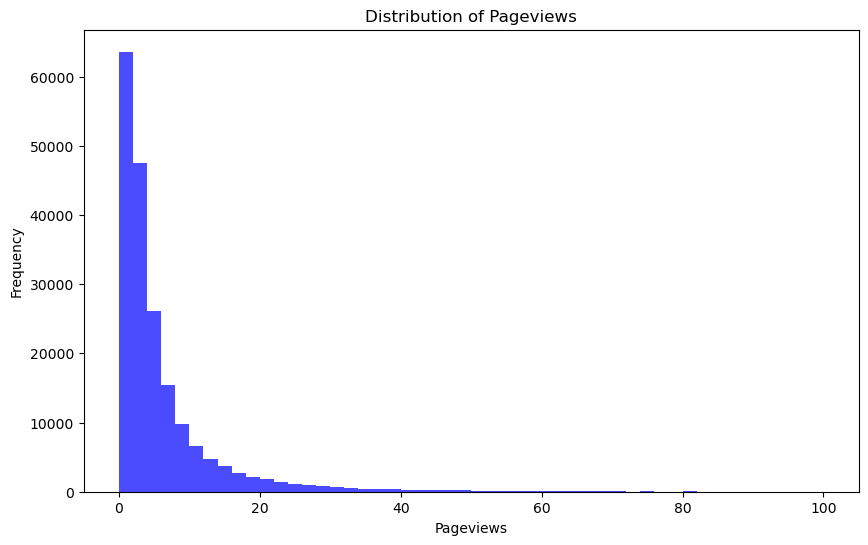

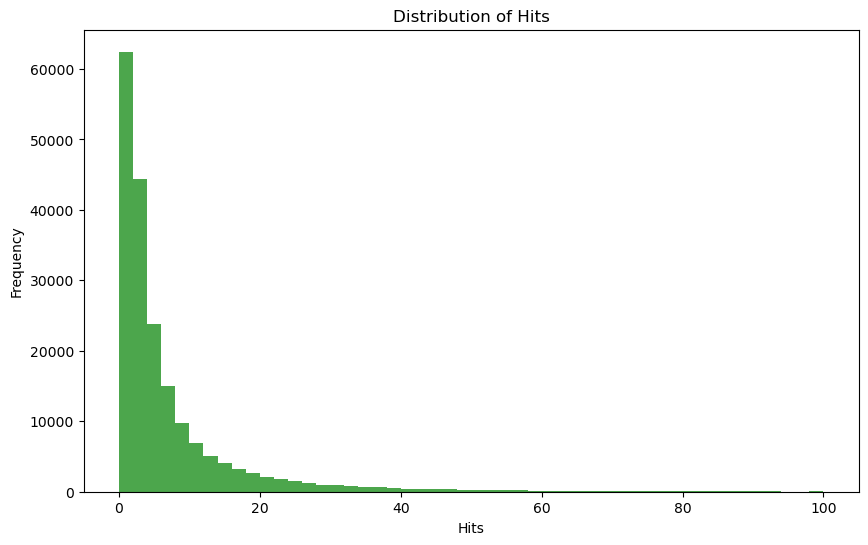

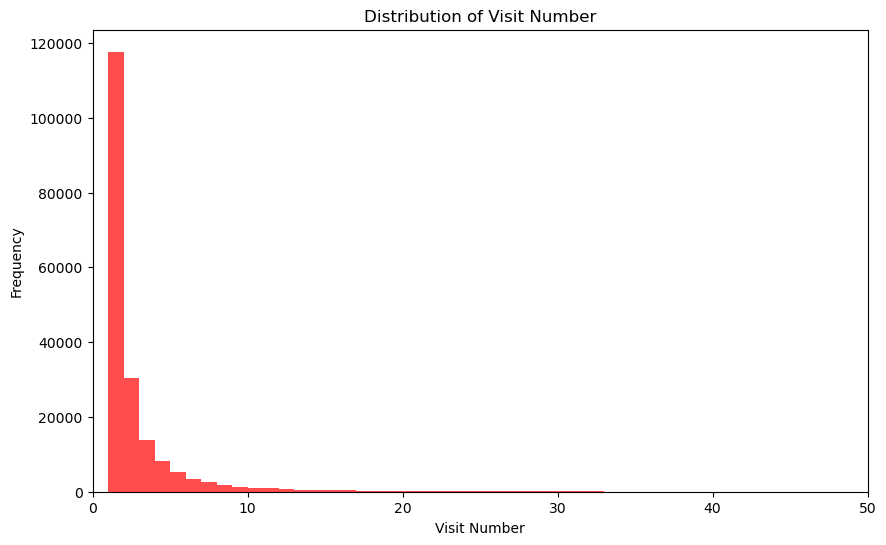

In [54]:
# Convert 'isMobile' to boolean, treating NaN as False
df['isMobile'] = df['isMobile'].fillna(False).astype(bool)

# Verify changes
print(df[['date', 'visitStartTime', 'isMobile', 'pageviews', 'hits']].head())

# Explore distribution of key variables
import matplotlib.pyplot as plt

# Distribution of 'pageviews'
plt.figure(figsize=(10, 6))
plt.hist(df['pageviews'], bins=50, range=[0, 100], color='blue', alpha=0.7)
plt.title('Distribution of Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'hits'
plt.figure(figsize=(10, 6))
plt.hist(df['hits'], bins=50, range=[0, 100], color='green', alpha=0.7)
plt.title('Distribution of Hits')
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.show()

# Analyze visitNumber distribution
plt.figure(figsize=(10, 6))
plt.hist(df['visitNumber'], bins=range(1, 51), color='red', alpha=0.7)
plt.title('Distribution of Visit Number')
plt.xlabel('Visit Number')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limiting x-axis for better visualization
plt.show()


/var/folders/8y/9ttyks_n5f7_6c4hyq6_g50r0000gn/T/ipykernel_6563/3402741400.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  channel_metrics = df.groupby('channelGrouping')['pageviews', 'hits'].mean().reset_index()


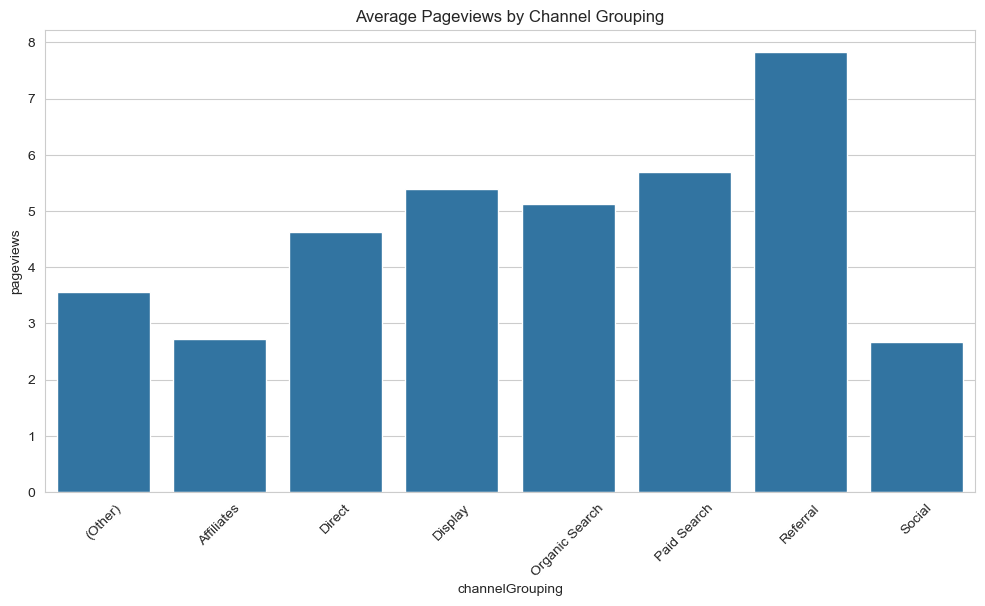

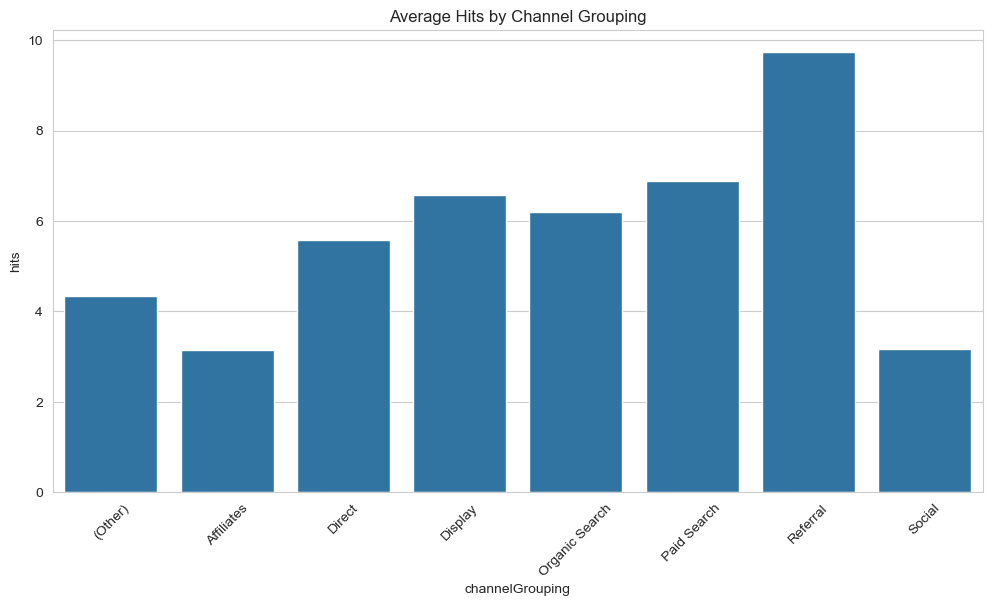

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate the mean pageviews and hits by channel grouping
channel_metrics = df.groupby('channelGrouping')['pageviews', 'hits'].mean().reset_index()

# Plot the average pageviews per channel grouping
plt.figure(figsize=(12, 6))
sns.barplot(x='channelGrouping', y='pageviews', data=channel_metrics)
plt.title('Average Pageviews by Channel Grouping')
plt.xticks(rotation=45)
plt.show()

# Plot the average hits per channel grouping
plt.figure(figsize=(12, 6))
sns.barplot(x='channelGrouping', y='hits', data=channel_metrics)
plt.title('Average Hits by Channel Grouping')
plt.xticks(rotation=45)
plt.show()


#### Observations
Display: Users coming from display ads are engaging with more pages and generating more hits on average.

Referral: This channel also shows high engagement, which can indicate good quality of traffic coming from these sources.

Social: Traffic from social channels has the lowest engagement in both pageviews and hits, which might suggest that users from social media are less interested or that the content they are presented with is not as relevant.

These insights can be crucial for marketing strategy, as they provide guidance on which channels could be worth investing more into and which might need a reevaluation of strategy.

/var/folders/8y/9ttyks_n5f7_6c4hyq6_g50r0000gn/T/ipykernel_6563/3907542236.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_type_metrics = df.groupby('userType')['pageviews', 'hits'].mean().reset_index()


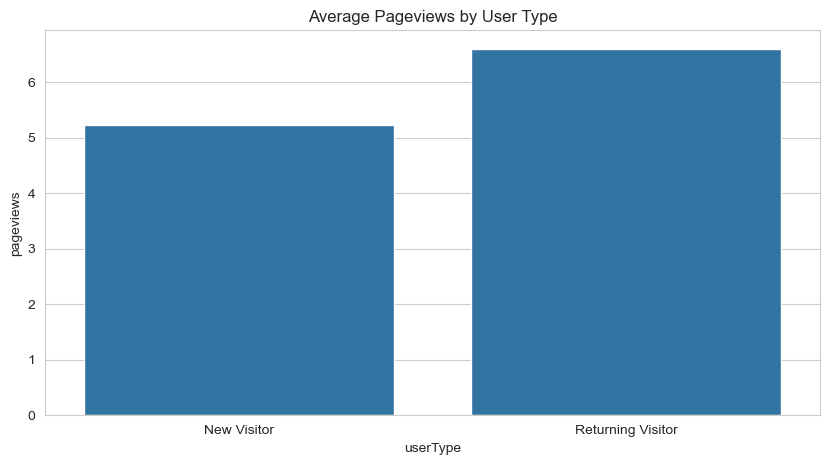

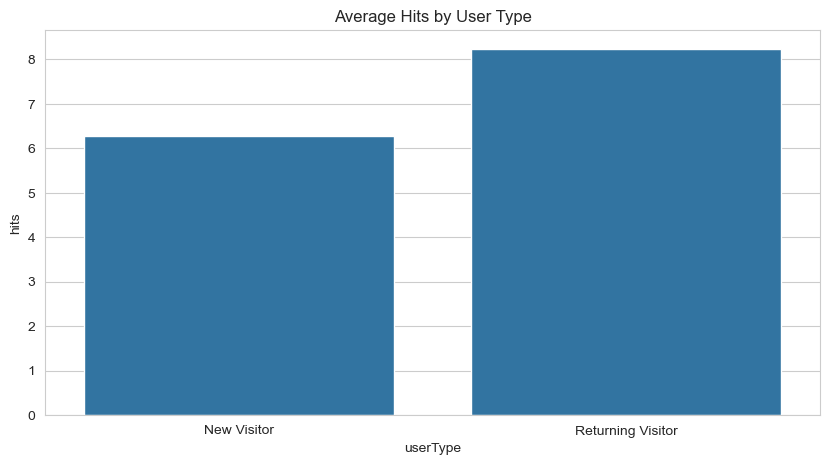

In [56]:
# Assuming that a NaN in 'newVisits' means it is not a new visit
df['userType'] = df['newVisits'].apply(lambda x: 'New Visitor' if x == 1.0 else 'Returning Visitor')

# Calculate the mean pageviews and hits by user type
user_type_metrics = df.groupby('userType')['pageviews', 'hits'].mean().reset_index()

# Plot the average pageviews per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='pageviews', data=user_type_metrics)
plt.title('Average Pageviews by User Type')
plt.show()

# Plot the average hits per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='hits', data=user_type_metrics)
plt.title('Average Hits by User Type')
plt.show()


The plots show a clear pattern: returning visitors tend to view more pages (pageviews) and generate more hits than new visitors.

#### Interpretation
Higher Engagement: Returning visitors have higher engagement metrics, which could indicate a successful user retention strategy or that once users find the site valuable, they are likely to come back and engage more.

Marketing Strategy: These insights can inform marketing strategies, emphasizing the importance of not just attracting new users but also retaining them, as they are more valuable in terms of engagement.
 
 

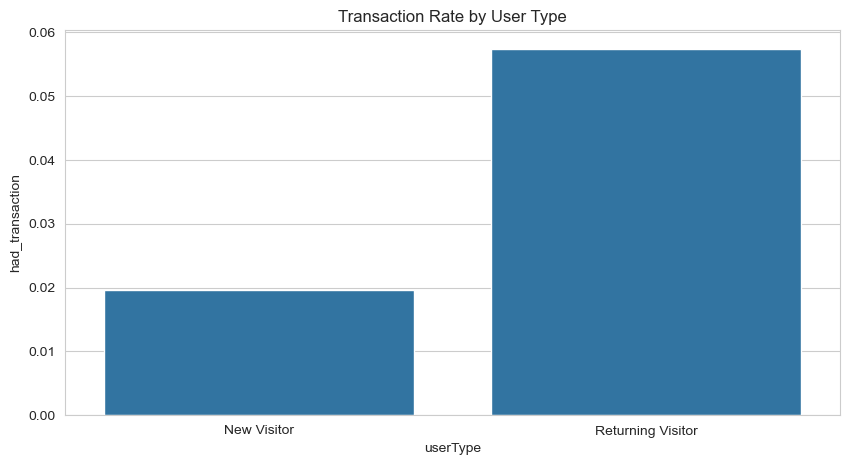

In [57]:
# Create a binary column indicating whether there was a transaction
df['had_transaction'] = df['transactionRevenue'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the transaction rate by user type
transaction_rate = df.groupby('userType')['had_transaction'].mean().reset_index()

# Plot the transaction rate per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='had_transaction', data=transaction_rate)
plt.title('Transaction Rate by User Type')
plt.show()

This aligns well with the previous observation that returning visitors are more engaged, as evidenced by higher pageviews and hits. It is reasonable to deduce that higher engagement correlates with a higher likelihood of completing a transaction. 

#### Interpretation:
User Value: Returning visitors not only engage more with the site but are also more likely to contribute to revenue, which makes them a valuable segment of the audience.

Customer Loyalty: The trend suggests a degree of customer loyalty or satisfaction since users are coming back and making purchases.

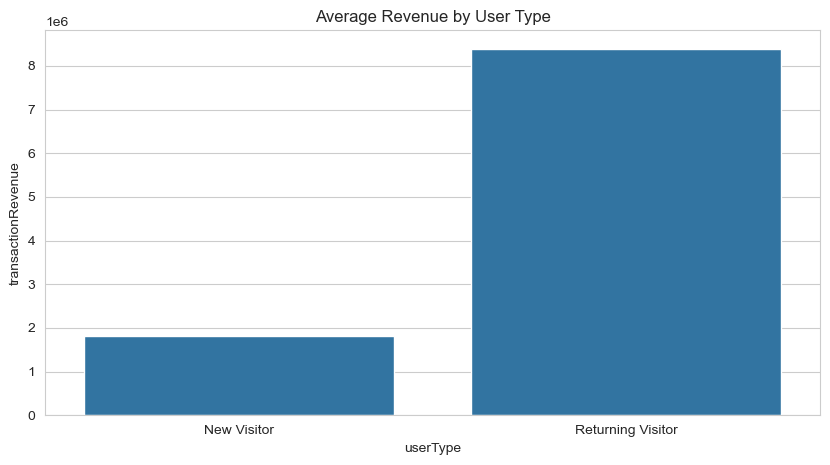

In [58]:
# Calculate the average revenue by user type
average_revenue = df.groupby('userType')['transactionRevenue'].mean().reset_index()

# Plot the average revenue per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='transactionRevenue', data=average_revenue)
plt.title('Average Revenue by User Type')
plt.show()


The plot once again reinforces the value of returning visitors, showing that they generate substantially higher average revenue per session compared to new visitors. This suggests that efforts to improve customer retention could be highly beneficial for the business.

#### Interpretation:
Customer Lifetime Value (CLV): The significant difference in average revenue between new and returning visitors implies that investing in increasing CLV can be a profitable strategy.

Marketing Spend Allocation: It might be advantageous to allocate more budget towards retention strategies or targeted marketing aimed at previous visitors, as they appear to be more lucrative.

# Non-Transaction Data

In [59]:
df = df[df['transactionRevenue'] != 0]
print(df.shape)

(6666, 37)


          date  visitStartTime  isMobile  pageviews  hits
752 2016-09-02      1472843572     False       11.0    11
753 2016-09-02      1472844906     False       10.0    11
799 2016-09-02      1472827393     False       11.0    13
802 2016-09-02      1472846398     False       12.0    13
866 2016-09-02      1472855945     False       17.0    17


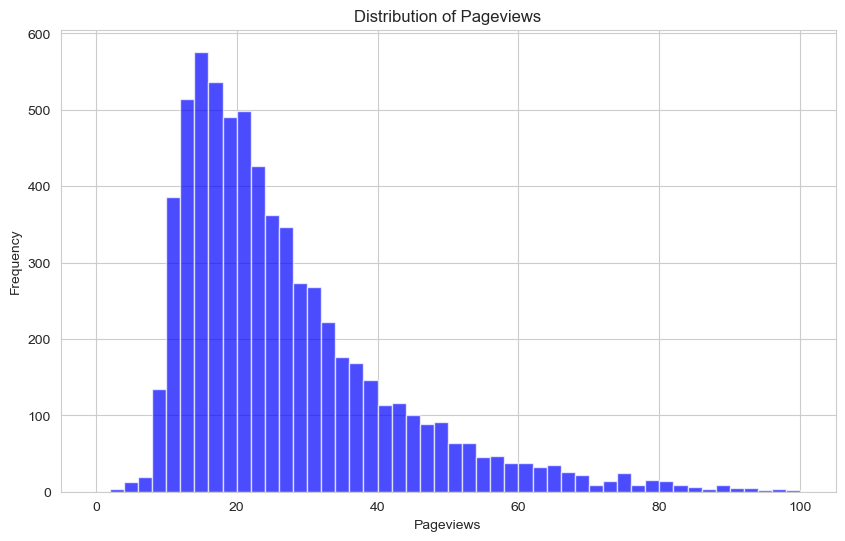

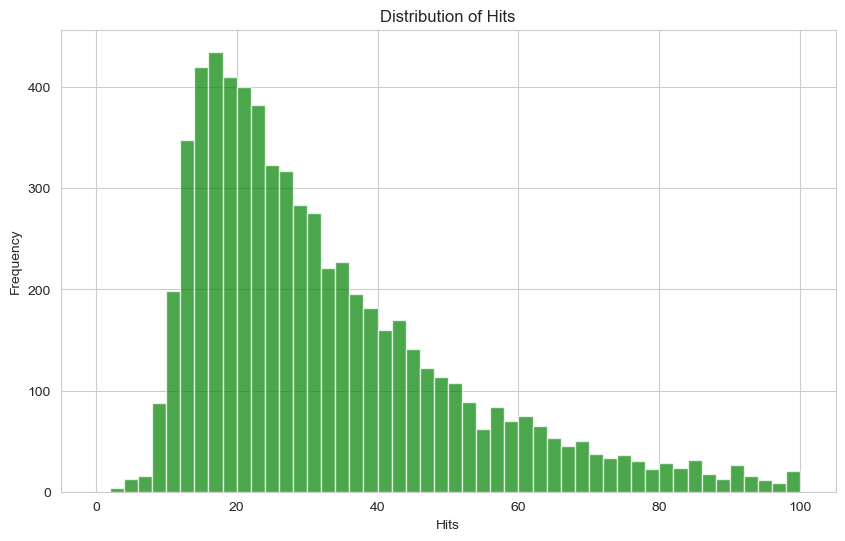

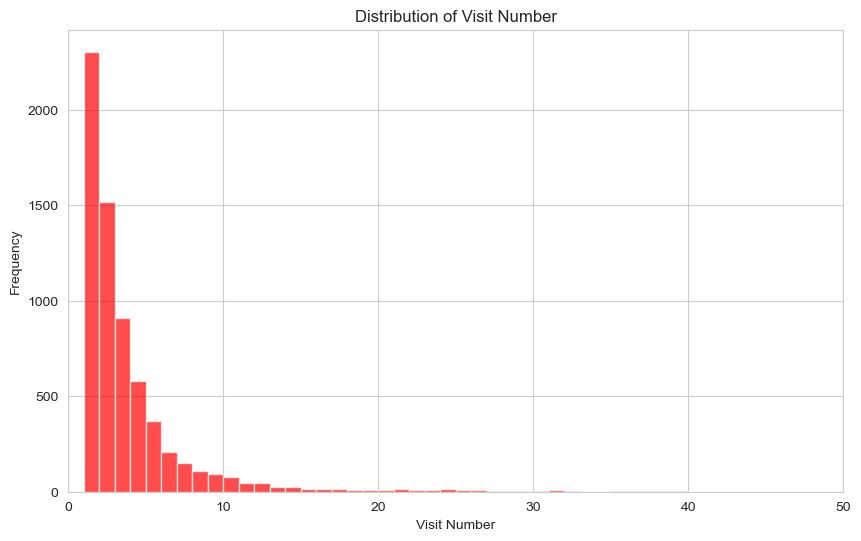

In [60]:
# Convert 'isMobile' to boolean, treating NaN as False
df['isMobile'] = df['isMobile'].fillna(False).astype(bool)

# Verify changes
print(df[['date', 'visitStartTime', 'isMobile', 'pageviews', 'hits']].head())

# Explore distribution of key variables
import matplotlib.pyplot as plt

# Distribution of 'pageviews'
plt.figure(figsize=(10, 6))
plt.hist(df['pageviews'], bins=50, range=[0, 100], color='blue', alpha=0.7)
plt.title('Distribution of Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'hits'
plt.figure(figsize=(10, 6))
plt.hist(df['hits'], bins=50, range=[0, 100], color='green', alpha=0.7)
plt.title('Distribution of Hits')
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.show()

# Analyze visitNumber distribution
plt.figure(figsize=(10, 6))
plt.hist(df['visitNumber'], bins=range(1, 51), color='red', alpha=0.7)
plt.title('Distribution of Visit Number')
plt.xlabel('Visit Number')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limiting x-axis for better visualization
plt.show()


/var/folders/8y/9ttyks_n5f7_6c4hyq6_g50r0000gn/T/ipykernel_6563/3402741400.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  channel_metrics = df.groupby('channelGrouping')['pageviews', 'hits'].mean().reset_index()


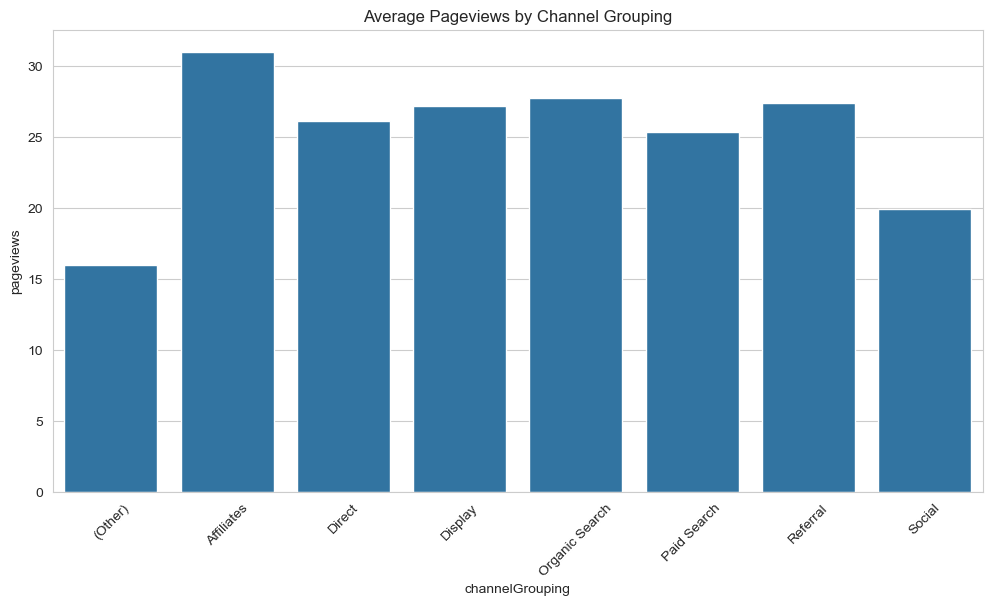

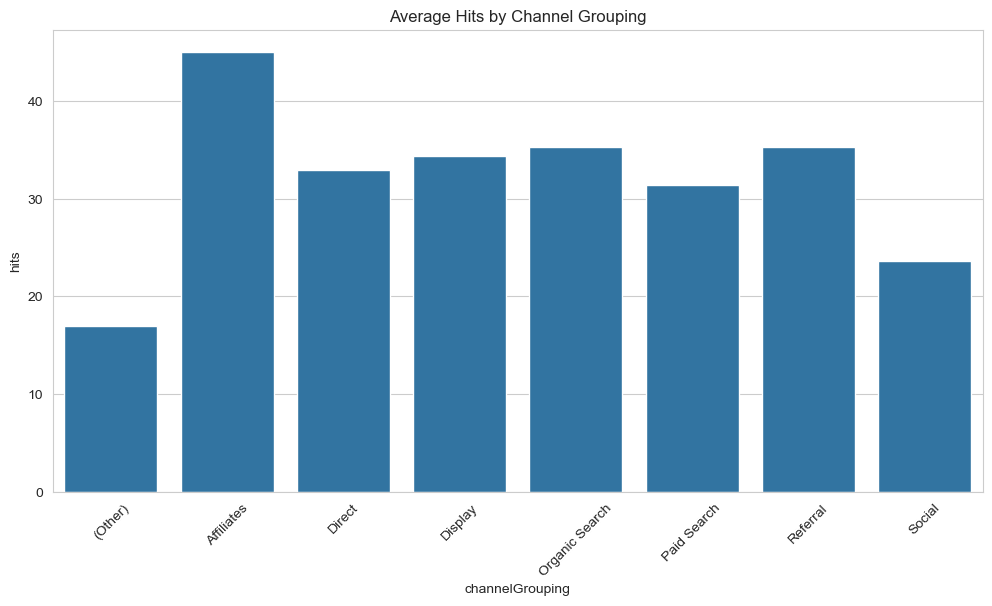

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate the mean pageviews and hits by channel grouping
channel_metrics = df.groupby('channelGrouping')['pageviews', 'hits'].mean().reset_index()

# Plot the average pageviews per channel grouping
plt.figure(figsize=(12, 6))
sns.barplot(x='channelGrouping', y='pageviews', data=channel_metrics)
plt.title('Average Pageviews by Channel Grouping')
plt.xticks(rotation=45)
plt.show()

# Plot the average hits per channel grouping
plt.figure(figsize=(12, 6))
sns.barplot(x='channelGrouping', y='hits', data=channel_metrics)
plt.title('Average Hits by Channel Grouping')
plt.xticks(rotation=45)
plt.show()


/var/folders/8y/9ttyks_n5f7_6c4hyq6_g50r0000gn/T/ipykernel_6563/3907542236.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_type_metrics = df.groupby('userType')['pageviews', 'hits'].mean().reset_index()


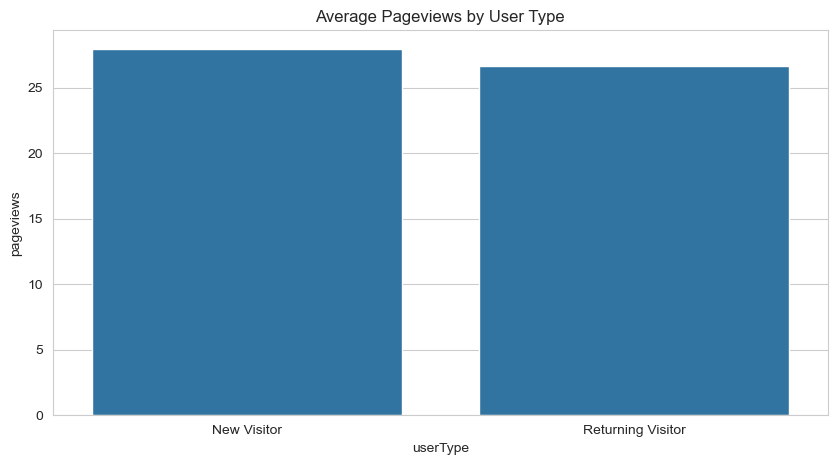

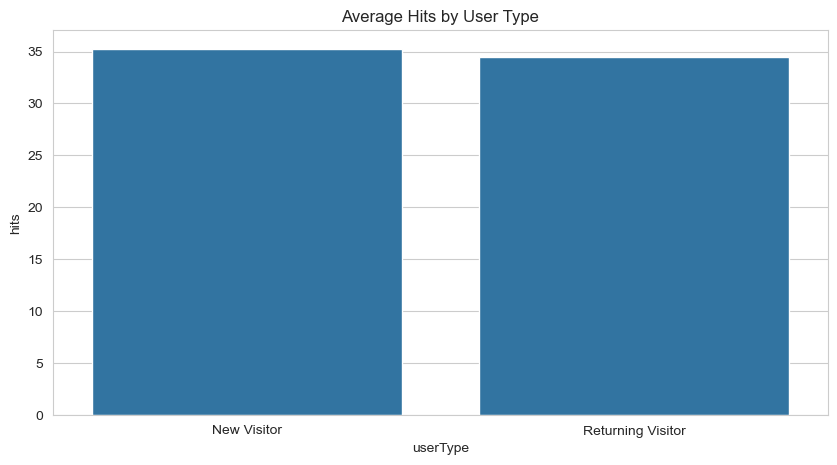

In [62]:
# Assuming that a NaN in 'newVisits' means it is not a new visit
df['userType'] = df['newVisits'].apply(lambda x: 'New Visitor' if x == 1.0 else 'Returning Visitor')

# Calculate the mean pageviews and hits by user type
user_type_metrics = df.groupby('userType')['pageviews', 'hits'].mean().reset_index()

# Plot the average pageviews per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='pageviews', data=user_type_metrics)
plt.title('Average Pageviews by User Type')
plt.show()

# Plot the average hits per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='hits', data=user_type_metrics)
plt.title('Average Hits by User Type')
plt.show()


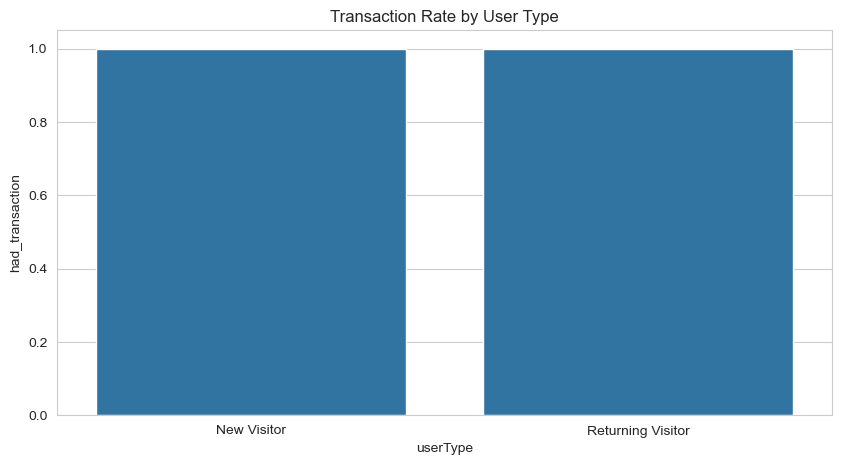

In [63]:
# Create a binary column indicating whether there was a transaction
df['had_transaction'] = df['transactionRevenue'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the transaction rate by user type
transaction_rate = df.groupby('userType')['had_transaction'].mean().reset_index()

# Plot the transaction rate per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='had_transaction', data=transaction_rate)
plt.title('Transaction Rate by User Type')
plt.show()

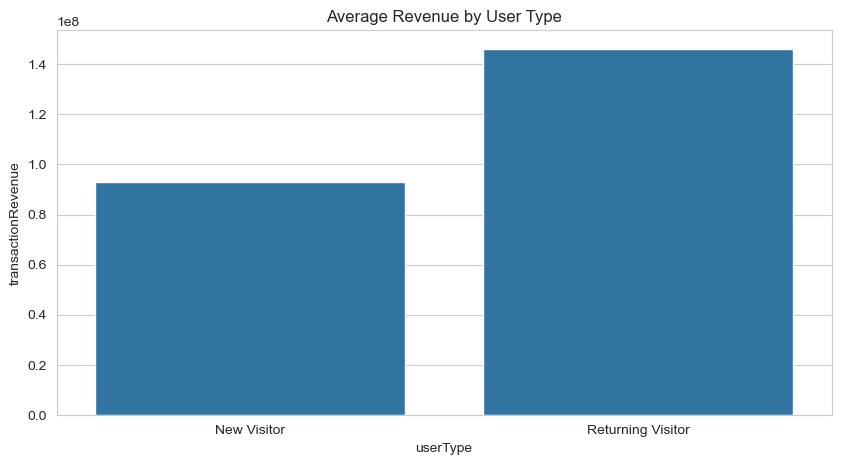

In [64]:
# Calculate the average revenue by user type
average_revenue = df.groupby('userType')['transactionRevenue'].mean().reset_index()

# Plot the average revenue per user type
plt.figure(figsize=(10, 5))
sns.barplot(x='userType', y='transactionRevenue', data=average_revenue)
plt.title('Average Revenue by User Type')
plt.show()


# Machine Learning 

## Preparing Data Set for Machine Learning

What is the causal effect of being a returning visitor (treatment) on the transaction revenue (outcome)? 

In [66]:
df1 = df.copy()

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6666 entries, 752 to 903315
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channelGrouping       6666 non-null   object        
 1   date                  6666 non-null   datetime64[ns]
 2   fullVisitorId         6666 non-null   object        
 3   sessionId             6666 non-null   object        
 4   socialEngagementType  6666 non-null   object        
 5   visitId               6666 non-null   int64         
 6   visitNumber           6666 non-null   int64         
 7   visitStartTime        6666 non-null   int64         
 8   continent             6666 non-null   object        
 9   subContinent          6666 non-null   object        
 10  country               6666 non-null   object        
 11  region                6666 non-null   object        
 12  metro                 6666 non-null   object        
 13  city          

In [68]:
df1.reset_index(drop=True, inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channelGrouping       6666 non-null   object        
 1   date                  6666 non-null   datetime64[ns]
 2   fullVisitorId         6666 non-null   object        
 3   sessionId             6666 non-null   object        
 4   socialEngagementType  6666 non-null   object        
 5   visitId               6666 non-null   int64         
 6   visitNumber           6666 non-null   int64         
 7   visitStartTime        6666 non-null   int64         
 8   continent             6666 non-null   object        
 9   subContinent          6666 non-null   object        
 10  country               6666 non-null   object        
 11  region                6666 non-null   object        
 12  metro                 6666 non-null   object        
 13  city              

In [69]:
df1.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,continent,subContinent,...,medium,isTrueDirect,month,day,year,quarter,day_of_month,is_weekend,userType,had_transaction
0,Direct,2016-09-02,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Americas,Northern America,...,other,True,9,2,2016,3rd_quarter,beginning,0,New Visitor,1
1,Organic Search,2016-09-02,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Americas,Northern America,...,organic,True,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1
2,Referral,2016-09-02,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Americas,Northern America,...,referral,True,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1
3,Referral,2016-09-02,185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Americas,Northern America,...,referral,True,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1
4,Referral,2016-09-02,3351538799616866750,3351538799616866750_1472855945,Not Socially Engaged,1472855945,2,1472855945,Americas,Northern America,...,referral,True,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1


In [72]:
# Create a binary treatment variable for returning visitors
df1['is_returning_visitor'] = df1['visitNumber'].apply(lambda x: 1 if x > 1 else 0)

# The outcome variable is already defined as 'transactionRevenue'
# You might want to log-transform the revenue to normalize its distribution
df1['log_transactionRevenue'] = df1['transactionRevenue'].apply(lambda x: np.log(x+1))

# Selecting potential confounders
# It's crucial to include variables that might influence both the treatment and the outcome
confounders = ['channelGrouping', 'continent', 'deviceCategory', 'isMobile', 'month', 'day', 'year']


In [73]:
print(df1.shape)
df1.head()

(6666, 39)


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,continent,subContinent,...,month,day,year,quarter,day_of_month,is_weekend,userType,had_transaction,is_returning_visitor,log_transactionRevenue
0,Direct,2016-09-02,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Americas,Northern America,...,9,2,2016,3rd_quarter,beginning,0,New Visitor,1,0,17.449406
1,Organic Search,2016-09-02,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Americas,Northern America,...,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1,1,19.541283
2,Referral,2016-09-02,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Americas,Northern America,...,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1,1,18.035459
3,Referral,2016-09-02,185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Americas,Northern America,...,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1,1,17.083177
4,Referral,2016-09-02,3351538799616866750,3351538799616866750_1472855945,Not Socially Engaged,1472855945,2,1472855945,Americas,Northern America,...,9,2,2016,3rd_quarter,beginning,0,Returning Visitor,1,1,15.941359


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   channelGrouping         6666 non-null   object        
 1   date                    6666 non-null   datetime64[ns]
 2   fullVisitorId           6666 non-null   object        
 3   sessionId               6666 non-null   object        
 4   socialEngagementType    6666 non-null   object        
 5   visitId                 6666 non-null   int64         
 6   visitNumber             6666 non-null   int64         
 7   visitStartTime          6666 non-null   int64         
 8   continent               6666 non-null   object        
 9   subContinent            6666 non-null   object        
 10  country                 6666 non-null   object        
 11  region                  6666 non-null   object        
 12  metro                   6666 non-null   object  

Drop:
fullVisitorId
sessionId 
visitId
visit start time
continet subcontine
region
metro
city
city id
networkdomain
source
quarter 
day_of_month
is_weekend

In [75]:
# Columns to be dropped
columns_to_drop = [
    'fullVisitorId',
    'date',
    'sessionId',
    'visitId',
    'visitStartTime',  # Adjusted based on common naming conventions; please correct as per your DataFrame
    'continent', 'subContinent',  # Corrected typo from "continet subcontine" to individual column names
    'region',
    'metro',
    'city',
    'cityId',  # Assuming camelCase or similar; adjust if your DataFrame uses a different convention
    'networkDomain',
    'source',
    'quarter',
    'day_of_month',
    'is_weekend',
    'transactionRevenue',
    'had_transaction',
    'userType',
    'day'
]

# Dropping the columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' allows the operation to proceed even if some columns are not found

# Now df has the specified columns removed and can be used for further analysis or modeling


In [76]:
print(df1.shape)
df1.head()

(6666, 19)


,channelGrouping,socialEngagementType,visitNumber,country,browser,operatingSystem,isMobile,deviceCategory,hits,pageviews,bounces,newVisits,campaign,medium,isTrueDirect,month,year,is_returning_visitor,log_transactionRevenue
0,Direct,Not Socially Engaged,1,United States,Chrome,Linux,False,desktop,11,11.0,0.0,1.0,No Campaign,other,True,9,2016,0,17.449406
1,Organic Search,Not Socially Engaged,3,United States,Chrome,Macintosh,False,desktop,11,10.0,0.0,0.0,No Campaign,organic,True,9,2016,1,19.541283
2,Referral,Not Socially Engaged,7,United States,Chrome,Linux,False,desktop,13,11.0,0.0,0.0,No Campaign,referral,True,9,2016,1,18.035459
3,Referral,Not Socially Engaged,6,United States,Chrome,Windows,False,desktop,13,12.0,0.0,0.0,No Campaign,referral,True,9,2016,1,17.083177
4,Referral,Not Socially Engaged,2,United States,Chrome,Linux,False,desktop,17,17.0,0.0,0.0,No Campaign,referral,True,9,2016,1,15.941359


### Exporting Code For Machine Learning

In [77]:
pwd = os.getcwd()

# Save your DataFrame to CSV using the full path
csv_file_path = os.path.join(pwd, 'train_new_uc2.csv')
df1.to_csv(csv_file_path, index=False)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   channelGrouping         6666 non-null   object 
 1   socialEngagementType    6666 non-null   object 
 2   visitNumber             6666 non-null   int64  
 3   country                 6666 non-null   object 
 4   browser                 6666 non-null   object 
 5   operatingSystem         6666 non-null   object 
 6   isMobile                6666 non-null   bool   
 7   deviceCategory          6666 non-null   object 
 8   hits                    6666 non-null   int64  
 9   pageviews               6666 non-null   float64
 10  bounces                 6666 non-null   float64
 11  newVisits               6666 non-null   float64
 12  campaign                6666 non-null   object 
 13  medium                  6666 non-null   object 
 14  isTrueDirect            6666 non-null   

In [ ]:
X = df1[['visitNumber', 'hits', 'pageviews', 'is_returning_visitor']]
y = df1['log_transactionRevenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.118061139516389


### Business Insight

### Forecasting Revenue: 
* In terms of revenue forecasting, an RMSE of 1.118 indicates the model's predictions are relatively close to the actual figures in the logarithmic scale. This level of accuracy can be considered good or adequate for certain types of strategic decisions, like budgeting, resource allocation, or financial planning, depending on the business's tolerance for risk and variability.
#### Comparative Performance
* If the business has previously relied on different models or human expertise for revenue predictions, an RMSE of 1.118 provides a quantitative measure to benchmark the current model's performance against past methods. A lower RMSE compared to historical benchmarks would suggest an improvement in forecasting accuracy.

## Improved Regression Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns based on your dataset
categorical_cols = ['channelGrouping', 'socialEngagementType', 'country', 'browser', 
                    'operatingSystem', 'deviceCategory', 'campaign', 'medium', 
                    'isMobile', 'isTrueDirect', 'is_returning_visitor']
numerical_cols = ['visitNumber', 'hits', 'pageviews', 'bounces', 'newVisits', 'month', 'year', 'log_transactionRevenue']

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])



In [ ]:
categorical_cols = ['channelGrouping', 'socialEngagementType', 'country', 'browser', 
                    'operatingSystem', 'deviceCategory', 'campaign', 'medium', 
                    'isMobile', 'isTrueDirect', 'is_returning_visitor']  # Assuming this is binary and treated as categorical
numerical_cols = ['visitNumber', 'hits', 'pageviews', 'bounces', 'newVisits', 'month', 'year']

features = numerical_cols + categorical_cols
X = df1[features]
y = df1['log_transactionRevenue']  # Target variable


In [ ]:
# Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [ ]:
# Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['visitNumber', 'hits',
                                                   'pageviews', 'bounces',
                                                   'newVisits', 'month',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                            

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.0863804415560898


With an RMSE of 1.0863804415560898, your model's predictions are, on average, about 1.0863 units away from the actual values in the log scale. This is a more accurate prediction compared to the previous average error of approximately 1.12 units.

## Causal Inference

What is the causal effect of being a returning visitor (treatment) on the transaction revenue (outcome)? 

In [ ]:
# Assuming df1 is your DataFrame
data = df1.copy()

# Specifying the model
model=CausalModel(
        data = data,
        treatment='is_returning_visitor',
        outcome='log_transactionRevenue',
        common_causes=['channelGrouping', 'socialEngagementType', 'visitNumber', 'country',
                       'browser', 'operatingSystem', 'isMobile', 'deviceCategory', 'hits',
                       'pageviews', 'bounces', 'newVisits', 'campaign', 'medium', 'isTrueDirect',
                       'month', 'year']
        )


In [ ]:
# Identify the causal effect
identified_estimand = model.identify_effect()


In [ ]:
# Estimate the causal effect
causal_estimate = model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression")

print(causal_estimate)


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
           d                                                                  
───────────────────────(E[log_transactionRevenue|medium,newVisits,deviceCatego
d[is_returning_visitor]                                                       

                                                                              
ry,browser,bounces,campaign,month,country,isMobile,socialEngagementType,channe
                                                                              

                                                                        
lGrouping,hits,isTrueDirect,operatingSystem,visitNumber,year,pageviews])
                                 

## Estimate Result
* Mean Value: The mean value of 79.24497348375434 is the estimated average effect of being a returning visitor on the log_transactionRevenue. This suggests that, holding other factors constant, being a returning visitor is associated with an increase in the log_transactionRevenue by approximately 79.245 units.
## Interpretation
* Substantial Impact: The estimated effect size is quite large, especially considering this is in the log scale. A change of 79.245 in log_transactionRevenue due to being a returning visitor implies a very substantial impact on transaction revenue.

## Business Insight

Customers who return to our platform after an initial purchase exhibit a significantly higher likelihood of converting again. Specifically, being a returning visitor is associated with a substantial increase in transaction revenue, as indicated by a remarkable estimated effect size of approximately 79.245 units on the log-transformed transaction revenue scale.

### Implications for Strategy

This finding underscores the immense value of nurturing and encouraging repeat visits among our customer base. It suggests that efforts to engage customers post-purchase—not only through targeted marketing campaigns but also by enhancing user experience, offering loyalty rewards, or providing personalized recommendations—could lead to markedly higher revenue generation.